In [1]:
#por lo pronto importaremos las librerias necesarios apra hacer el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.float_format = '{:.0f}'.format #devido a que hay números grandes en algunas casillas se configura el formato para que se neústones completos


Introducción:

Particularmente, con este EDA (Exploratory Data Analysis), se busca analizar si hay algún tipo de correlación, ya sea inversa o directa, en el acceso a internet, la adquisición de servicios postales y el acceso a suscripciones de televisión en cada provincia de Argentina.

Los datos que se utilizarán en este análisis fueron tomados de la página de datos abiertos del Ente Nacional de Comunicaciones de Argentina (ENACOM). 

https://datosabiertos.enacom.gob.ar/home

En el análisis se utilizarán conjuntos de datos que contienen información sobre la conectividad a Internet, incluyendo el tipo de conexión utilizada y la tecnología empleada para dicha conexión. También se emplearán datos relacionados con las suscripciones a servicios de televisión por provincia y la adquisición de servicios postales en esas mismas provincias.

ENACOM es un organismo estatal de Argentina, creado en 2016, con el objetivo de regular y supervisar el sector de las comunicaciones en el país. Su misión principal es garantizar el acceso igualitario y universal a los servicios de comunicaciones en todo el territorio argentino.


In [2]:
#cargamos los data set necesarios, para analizar el rendimiento del servicio de internet prestado por la empresa 
Vel_inter = pd.read_csv('Internet\historico_velocidad_internet.csv') #velocidad media de bajada por provincia
Acceso_tecno = pd.read_csv('Internet\Internet_Accesos-por-tecnologia.csv') #que tanto se utiliza cada tecnología según la provincia
Conexion =pd.read_csv('Internet\Internet_BAF.csv')#acceso mediante banda ancha o dial up por provincia
postales =pd.read_csv('otro medios de comunicacion\servicios_postales_provincias_personal.csv') #Ventas de Servicios Postales por Provincia
television = pd.read_csv('otro medios de comunicacion\Television.csv') #Accesos de televisión por suscripción por provincia

Iniciemos EDA y ETL PARA CADA UNO DE LOS DATASET POR SEPARADO

## 1. Obtengas información básica de cada csv, veamos si hay datos nulos y como se comportan los datos, para identificar si los csv pueden unirse  

Vel_inter

In [3]:
Vel_inter.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [4]:
#tamaño del dataset
Vel_inter.shape

(840, 6)

In [5]:
#informacion del dataset
Vel_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [6]:
#previmante observamos que las columnas unamed 4 y unnamed 5 estabn vacias, sin emabrgo lo ratificamos y procedemos a elimnarlas.
Vel_inter.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Mbps (Media de bajada)      0
Unnamed: 4                840
Unnamed: 5                840
dtype: int64

In [7]:
Vel_inter.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [8]:
columnas = ['Unnamed: 4', 'Unnamed: 5']
Vel_inter.drop(columns= columnas, inplace= True)

In [9]:
Vel_inter.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


Acceso_tecno

In [10]:
Acceso_tecno.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,127,70,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,6,32,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1,2,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8,2,144.146
4,2022,3,Chubut,45.377,72.212,9.574,30,9,165.778


In [11]:
#tamaño
Acceso_tecno.shape

(841, 9)

In [12]:
#informacion del dataset
Acceso_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [13]:
#buscamos datos nulos
Acceso_tecno.isnull().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [14]:
#Identificamos la fila exacta en donde están los datos nulos y observamos que se pueden eliminar sin alterar la información que nos trasmite el csv
Acceso_tecno[Acceso_tecno.isnull().any(axis=1)]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
840,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
Acceso_tecno.drop(index=840, inplace= True)

In [16]:
Acceso_tecno.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
835,2014,1,Santa Cruz,18.927,100,381,4,3,26.764
836,2014,1,Santa Fe,322.662,174.296,3.059,6,644,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915,34,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1,3,28.038
839,2014,1,Tucumán,129.717,83,121,13,98,130.032


Conexion

In [17]:
Conexion.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [18]:
#tamaño
Conexion.shape

(840, 6)

In [19]:
#inforacion basica
Conexion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [20]:
#Observamos que hay datos faltantes en la columna dial up por lo que veremos de que se trata y que se puede hacer en este caso
Conexion[Conexion.isnull().any(axis=1)]
#se evidencia que no son datos nulos o faltantes, en cambio, se trata de que dichas provincias no utilizan la tecnología dial up por lo que debemos remplazar esos datos por 0 

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
416,2018,2,Formosa,44.554,NaN,44.554
421,2018,2,Misiones,106.147,NaN,106.147


In [21]:
Conexion = Conexion.fillna(0)

In [22]:
#Verificaos el cambio 
index = [416, 421]

Conexion.loc[index, :]


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
416,2018,2,Formosa,44.554,0,44.554
421,2018,2,Misiones,106.147,0,106.147


a continuación, identifiquemos si hay algunas provincias que no estén en todos los csv, ya que se pretende unir estos dataset por esta columna.

In [23]:
unicos_Vel_inter= Vel_inter['Provincia'].unique()
unicos_Acceso_tecno= Acceso_tecno['Provincia'].unique()
unicos_Conexion = Conexion['Provincia'].unique()

In [24]:
unicos_Vel_inter

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [25]:
unicos_Acceso_tecno

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [26]:
unicos_Conexion

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [27]:
# Identificar los elementos únicos en 'unicos_Vel_inter' que no están en 'unicos_Acceso_tecno' ni en 'unicos_internet'
elementos_Vel_inter = np.setdiff1d(unicos_Vel_inter, np.union1d(unicos_Acceso_tecno, unicos_Conexion))

# Identificar los elementos únicos en 'unicos_Acceso_tecno' que no están en 'unicos_Vel_inter' ni en 'unicos_internet'
elementos_Acceso_tecno = np.setdiff1d(unicos_Acceso_tecno, np.union1d(unicos_Vel_inter, unicos_Conexion))

# Identificar los elementos únicos en 'unicos_internet' que no están en 'unicos_Vel_inter' ni en 'unicos_Acceso_tecno'
elementos_Conexion = np.setdiff1d(unicos_Conexion, np.union1d(unicos_Vel_inter, unicos_Acceso_tecno))

# Mostrar los elementos únicos en cada array
print("Elementos únicos en 'unicos_Vel_inter':")
print(elementos_Vel_inter)

print("Elementos únicos en 'unicos_Acceso_tecno':")
print(elementos_Acceso_tecno)

print("Elementos únicos en 'unicos_Conexion':")
print(elementos_Conexion)


Elementos únicos en 'unicos_Vel_inter':
[]
Elementos únicos en 'unicos_Acceso_tecno':
[]
Elementos únicos en 'unicos_Conexion':
[]


A partir de lo anterior, podemos determinar que cada uno de los datasets contienen las mismas provincias.
Ahora identifiquemos si se repiten la misma cantidad de veces.

In [28]:
Vel_inter['Provincia'].value_counts()

Buenos Aires           35
Capital Federal        35
Tierra Del Fuego       35
Santiago Del Estero    35
Santa Fe               35
Santa Cruz             35
San Luis               35
San Juan               35
Salta                  35
Río Negro              35
Neuquén                35
Misiones               35
Mendoza                35
La Rioja               35
La Pampa               35
Jujuy                  35
Formosa                35
Entre Ríos             35
Corrientes             35
Córdoba                35
Chubut                 35
Chaco                  35
Catamarca              35
Tucumán                35
Name: Provincia, dtype: int64

In [29]:
Acceso_tecno['Provincia'].value_counts()

Buenos Aires           35
Capital Federal        35
Tierra Del Fuego       35
Santiago Del Estero    35
Santa Fe               35
Santa Cruz             35
San Luis               35
San Juan               35
Salta                  35
Río Negro              35
Neuquén                35
Misiones               35
Mendoza                35
La Rioja               35
La Pampa               35
Jujuy                  35
Formosa                35
Entre Ríos             35
Corrientes             35
Córdoba                35
Chubut                 35
Chaco                  35
Catamarca              35
Tucumán                35
Name: Provincia, dtype: int64

In [30]:
Conexion['Provincia'].value_counts()

Buenos Aires           35
Capital Federal        35
Tierra Del Fuego       35
Santiago Del Estero    35
Santa Fe               35
Santa Cruz             35
San Luis               35
San Juan               35
Salta                  35
Río Negro              35
Neuquén                35
Misiones               35
Mendoza                35
La Rioja               35
La Pampa               35
Jujuy                  35
Formosa                35
Entre Ríos             35
Corrientes             35
Córdoba                35
Chubut                 35
Chaco                  35
Catamarca              35
Tucumán                35
Name: Provincia, dtype: int64

Aunque a simple vista se ve que las provincias se repiten la misma cantidad de veces en los df, haremos una iteración en cada uno para tener mas certeza de este hecho 

In [31]:
# creemos una lista de df
lista_dataframes = [Vel_inter, Acceso_tecno, Conexion]
provincias_unicas = [] #creamos una lista vacia, para agregar provincias.


In [32]:
#iteramos en la lista de df, para agregar las provincias a la lista de proivincias 
for df in lista_dataframes:
    if 'Provincia' in df.columns:
        provincias_unicas.extend(df['Provincia'].unique())


In [33]:
provincias_unicas


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán',
 'Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán',
 'Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán'

In [34]:
# setiamos las lista de provincias apra dejar los valores unicos y convertimos en lista 
provincias_unicas = list(set(provincias_unicas))  


In [35]:
provincias_unicas

['Formosa',
 'Catamarca',
 'Chubut',
 'San Luis',
 'Jujuy',
 'Santiago Del Estero',
 'Santa Fe',
 'Buenos Aires',
 'Entre Ríos',
 'Santa Cruz',
 'Neuquén',
 'Corrientes',
 'Río Negro',
 'Capital Federal',
 'Chaco',
 'La Pampa',
 'San Juan',
 'Mendoza',
 'Córdoba',
 'Misiones',
 'Tucumán',
 'Salta',
 'Tierra Del Fuego',
 'La Rioja']

In [36]:
# Instanciamos una variable como True para inicializarla
repite_misma_cantidad = True

# Iteramos sobre cada provincia encontrada en la lista de provincias únicas
for provincia in provincias_unicas:
    # Creamos una lista vacía para almacenar las frecuencias de la provincia en cada DataFrame
    frecuencias = []
    
    # Iteramos sobre la lista de DataFrames
    for df in lista_dataframes:
        # Calculamos las frecuencias de las provincias en el DataFrame actual
        frecuencia_provincias = df['Provincia'].value_counts()
        # Agregamos las frecuencias a la lista
        frecuencias.append(frecuencia_provincias)
    
    # Comparamos las frecuencias de la provincia entre los DataFrames restantes
    # utilizando la función all() y una comprensión de lista
    repite_misma_cantidad_provincia = all(
        frecuencias[0].get(provincia, 0) == frecuencia.get(provincia, 0) #se compara que la frecuencia de la provincia en el primer objeto serie de frecuencias sea igual a los demás objetos series de frecuencia 
        for frecuencia in frecuencias[1:] #ciclo for lo que hace es ir de provincia en provincia y para cada provincia ejecuta 'frecuencias[0].get(provincia, 0) == frecuencia.get(provincia, 0)'
    )
    
    # Si la frecuencia de la provincia difiere entre los DataFrames restantes,
    # actualizamos la variable repite_misma_cantidad a False y salimos del bucle
    if not repite_misma_cantidad_provincia:
        repite_misma_cantidad = False
        break

# Verificamos el valor de repite_misma_cantidad para determinar si todas las provincias
# se repiten la misma cantidad de veces en todos los DataFrames
if repite_misma_cantidad:
    print("Todas las provincias se repiten la misma cantidad de veces en todos los DataFrames.")
else:
    print("No todas las provincias se repiten la misma cantidad de veces en todos los DataFrames.")

 

Todas las provincias se repiten la misma cantidad de veces en todos los DataFrames.


Aplciaremos la misma logica para columna año

In [37]:
Vel_inter['Año'].value_counts().sort_index()

2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    72
Name: Año, dtype: int64

In [38]:
Acceso_tecno['Año'].value_counts().sort_index()

2014      96
2015      96
2016      96
2017      96
2018      96
2019      24
2019 *    72
2020      96
2021      96
2022      72
Name: Año, dtype: int64

se observa que en el df 'Acceso_tecno' el año 2019, también se repite 96 veces, sin embargo, algunas de las filas, tienen el año registrado con un asterisco (* ), por lo que se indaga que relevancia tiene esto para los datos, notando que esta no es relevante para la data, por lo que se reitera el asterisco (* )

In [39]:
Acceso_tecno.loc[Acceso_tecno['Año'] == '2019 *', :]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
288,2019 *,3 *,Buenos Aires,1.277.249,2.144.956,425.386,86,27,3.960.233
289,2019 *,3 *,Capital Federal,300.288,1.080.973,24.900,4,31,1.441.211
290,2019 *,3 *,Catamarca,24.349,5.543,13,244,2,32.400
291,2019 *,3 *,Chaco,50.416,49.156,8.063,5,2,114.451
292,2019 *,3 *,Chubut,37.298,27.090,1.917,15,8,89.005
...,...,...,...,...,...,...,...,...,...
355,2019 *,1 *,Santa Cruz,10.659,4.615,382,7,3,24.905
356,2019 *,1 *,Santa Fe,340.038,340.344,15.621,23,18,737.078
357,2019 *,1 *,Santiago Del Estero,25.337,61.547,23,3,99,89.853
358,2019 *,1 *,Tierra Del Fuego,19.789,23.549,1.623,0,1,46.447


In [40]:
# dado que en la columna trimestre se repite el caso de la columna año, también se eliminará el asterisco (*) y los espacios en blanco
Acceso_tecno['Año'] = Acceso_tecno['Año'].str.replace('*', '').str.strip()
Acceso_tecno['Trimestre'] = Acceso_tecno['Trimestre'].str.replace('*', '').str.strip()

C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\1211469278.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_tecno['Año'] = Acceso_tecno['Año'].str.replace('*', '').str.strip()
C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\1211469278.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Acceso_tecno['Trimestre'] = Acceso_tecno['Trimestre'].str.replace('*', '').str.strip()


In [41]:
Acceso_tecno['Año'].value_counts().sort_index()

2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    72
Name: Año, dtype: int64

In [42]:
Conexion['Año'].value_counts().sort_index()

2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    72
Name: Año, dtype: int64

Ya habiendo hecho lo pertinente en cada df, procederemos a combinarlos, tomando en cuenta las columnas ‘Año’, ‘Trimestre’ y ‘Provincia’, sin embargo, dichas columnas no están en lo mismos tipos de datos, por los que se convertirán al tipo de dato necesario para unir los df.  

In [43]:
print( Conexion.dtypes)
print('\n', Vel_inter.dtypes)
print('\n', Acceso_tecno.dtypes)

Año                  int64
Trimestre            int64
Provincia           object
Banda ancha fija    object
Dial up             object
Total               object
dtype: object

 Año                        int64
Trimestre                  int64
Provincia                 object
Mbps (Media de bajada)     int64
dtype: object

 Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object


In [44]:
#cambiemos el tipo de dato de las columnas Año y Trimestre, paraque pase de object a int
columnas = ['Año', 'Trimestre']
Acceso_tecno[columnas] = Acceso_tecno[columnas].astype(int)
Acceso_tecno.dtypes

Año               int32
Trimestre         int32
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

## 2. unamos los df

In [45]:
# Unir los DataFrames por las columnas "año", "trimestre" y "provincia"
datos_internet = pd.merge(Acceso_tecno, Conexion,  on=['Año', 'Trimestre', 'Provincia'])
datos_internet = pd.merge(datos_internet, Vel_inter, on=['Año', 'Trimestre', 'Provincia'])

datos_internet.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,Banda ancha fija,Dial up,Total_y,Mbps (Media de bajada)
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,127,70,4.721.668,4.715.469,6.199,4.721.668,70
1,2022,3,Capital Federal,140.791,1.240.125,129.218,6,32,1.547.679,1.545.534,2.145,1.547.679,101
2,2022,3,Catamarca,10.010,10.495,46.224,1,2,70.293,70.292,1,70.293,61
3,2022,3,Chaco,27.164,61.800,44.645,8,2,144.146,144.141,5,144.146,53
4,2022,3,Chubut,45.377,72.212,9.574,30,9,165.778,164.874,904,165.778,16


In [46]:
#Debido a que la columna Total_x y total_y hace referencia a al total de conexiones a internet por provincia, se creerá una columna llamada Total_conexiones, que contenga dichos datos.
datos_internet['Total_conexiones'] = datos_internet['Total_x']
datos_internet.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
datos_internet.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,127,70,4.715.469,6.199,70,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,6,32,1.545.534,2.145,101,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1,2,70.292,1,61,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8,2,144.141,5,53,144.146
4,2022,3,Chubut,45.377,72.212,9.574,30,9,164.874,904,16,165.778


Breve descripción del contenido de las columnas.

Año: año en curso de los datos que alberga la fila

Trimestre: Trimestre en curso de los datos que alberga la fila

Provincia : lugar de donde se tomaron el dato

ADSL, Cablemodem, Fibra óptica, Wireless, Otros: tecnologías usadas para la conectividad a internet.

Banda ancha fija, Dial up: tipos de conexión.

Mbps (Media de bajada): velocidad de conectividad promedio.


In [47]:
#Información básica sobre el df
datos_internet.info()
#Las columnas deberían ser de tipo int y esta en formato object, por lo que debe cambiarse el tipo de dato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int32  
 1   Trimestre               840 non-null    int32  
 2   Provincia               840 non-null    object 
 3   ADSL                    840 non-null    object 
 4   Cablemodem              840 non-null    object 
 5   Fibra óptica            840 non-null    object 
 6   Wireless                840 non-null    float64
 7   Otros                   840 non-null    float64
 8   Banda ancha fija        840 non-null    object 
 9   Dial up                 840 non-null    object 
 10  Mbps (Media de bajada)  840 non-null    int64  
 11  Total_conexiones        840 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 78.8+ KB


In [48]:
datos_internet.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Banda ancha fija', 'Dial up',
       'Mbps (Media de bajada)', 'Total_conexiones'],
      dtype='object')

In [49]:
#se seleccionan las columnas en las que se cambaira el tipo de dato
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Banda ancha fija', 'Dial up', 'Total_conexiones']

In [50]:
#los números con unidad decimal y unidad de millón, están delimitados por punto (.), por lo que hay que borrarlos. Ejemplo: pasar de 1.000 a 1000
for col in columnas:
    datos_internet[col] = datos_internet[col].str.replace('.', '').str.strip()

C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\3641709488.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos_internet[col] = datos_internet[col].str.replace('.', '').str.strip()


In [51]:
#verificamos
datos_internet.head(1)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
0,2022,3,Buenos Aires,339648,2748325,1436433,127,70,4715469,6199,70,4721668


In [52]:
#examinamos los datos, y notamos que hay 2 datos faltantes o nulos en la columna 'Dial up'
datos_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int32  
 1   Trimestre               840 non-null    int32  
 2   Provincia               840 non-null    object 
 3   ADSL                    840 non-null    object 
 4   Cablemodem              840 non-null    object 
 5   Fibra óptica            840 non-null    object 
 6   Wireless                840 non-null    float64
 7   Otros                   840 non-null    float64
 8   Banda ancha fija        840 non-null    object 
 9   Dial up                 838 non-null    object 
 10  Mbps (Media de bajada)  840 non-null    int64  
 11  Total_conexiones        840 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 78.8+ KB


In [53]:
datos_internet[datos_internet.isnull().any(axis=1)]


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
416,2018,2,Formosa,23543,7311,18,14,57,44554,NaN,9,44554
421,2018,2,Misiones,57265,47923,512,391,56,106147,NaN,12,106147


In [54]:
#al quitar los puntos (.) se repite el “error” en la columna Dial up, que ya se descubrió que no son datos nulos ni faltantes, sino que las provincias no usan dicha tecnología 

datos_internet=datos_internet.fillna('0')

In [55]:
index = [416, 421]

datos_internet.loc[index, :]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
416,2018,2,Formosa,23543,7311,18,14,57,44554,0,9,44554
421,2018,2,Misiones,57265,47923,512,391,56,106147,0,12,106147


In [56]:
datos_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int32  
 1   Trimestre               840 non-null    int32  
 2   Provincia               840 non-null    object 
 3   ADSL                    840 non-null    object 
 4   Cablemodem              840 non-null    object 
 5   Fibra óptica            840 non-null    object 
 6   Wireless                840 non-null    float64
 7   Otros                   840 non-null    float64
 8   Banda ancha fija        840 non-null    object 
 9   Dial up                 840 non-null    object 
 10  Mbps (Media de bajada)  840 non-null    int64  
 11  Total_conexiones        840 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 111.0+ KB


Al intentar cambiar las columnas a tipo de dato int, descubrimos que la columna ‘Dial up’ posee datos ’- 0’, que realmente no es importante para el total de conexiones, por lo que se convertirá en ‘0’

In [57]:
datos_internet.loc[datos_internet['Dial up'] == '- 0']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
9,2022,3,Jujuy,19257,52978,40172,4,2,118823,- 0,32,118823
13,2022,3,Misiones,35513,88902,39046,11,8,182157,- 0,49,182157
32,2022,2,Formosa,15397,25487,9875,17,212,67881,- 0,28,67881
33,2022,2,Jujuy,20303,54495,34184,4,2,115314,- 0,29,115314
37,2022,2,Misiones,37208,89260,33649,11,8,178813,- 0,46,178813
80,2021,4,Formosa,17211,15111,5151,16,172,53663,- 0,29,53663
81,2021,4,Jujuy,22330,60511,24156,3,4,113915,- 0,27,113915
85,2021,4,Misiones,41778,92068,22035,8,8,171132,- 0,39,171132
104,2021,3,Formosa,18093,14111,4730,16,171,52795,- 0,27,52795
105,2021,3,Jujuy,23554,60758,19926,3,4,111158,- 0,26,111158


In [58]:
#guardamos los índices para hacer una verificación del cambio posteriormente.
indices = datos_internet.loc[datos_internet['Dial up'] == '- 0'].index


In [59]:
datos_internet['Dial up'] = datos_internet['Dial up'].replace('- 0', '0')

In [60]:
#verificamos
np.array(datos_internet.loc[indices, 'Dial up'])

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [61]:
#Ahora si, con las transformaciones necesarias haremos la conversión en los tipos de dato dato
datos_internet[columnas] = datos_internet[columnas].astype(int)
datos_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int32  
 1   Trimestre               840 non-null    int32  
 2   Provincia               840 non-null    object 
 3   ADSL                    840 non-null    int32  
 4   Cablemodem              840 non-null    int32  
 5   Fibra óptica            840 non-null    int32  
 6   Wireless                840 non-null    float64
 7   Otros                   840 non-null    float64
 8   Banda ancha fija        840 non-null    int32  
 9   Dial up                 840 non-null    int32  
 10  Mbps (Media de bajada)  840 non-null    int64  
 11  Total_conexiones        840 non-null    int32  
dtypes: float64(2), int32(8), int64(1), object(1)
memory usage: 91.4+ KB


In [62]:
datos_internet.head(30)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Mbps (Media de bajada),Total_conexiones
0,2022,3,Buenos Aires,339648,2748325,1436433,127,70,4715469,6199,70,4721668
1,2022,3,Capital Federal,140791,1240125,129218,6,32,1545534,2145,101,1547679
2,2022,3,Catamarca,10010,10495,46224,1,2,70292,1,61,70293
3,2022,3,Chaco,27164,61800,44645,8,2,144141,5,53,144146
4,2022,3,Chubut,45377,72212,9574,30,9,164874,904,16,165778
5,2022,3,Córdoba,163770,465461,338570,61,10,1038600,68,56,1038668
6,2022,3,Corrientes,36508,77140,18619,7,5,144842,4,45,144846
7,2022,3,Entre Ríos,60345,132952,36971,26,13,268937,22,42,268959
8,2022,3,Formosa,14470,25880,11041,17,212,68537,1,30,68538
9,2022,3,Jujuy,19257,52978,40172,4,2,118823,0,32,118823


In [63]:
datos_internet.to_csv('Internet\datos_internet.csv')

## 3. Analizaremos datase complementarios

postales.

Este data set contiene datos sobre la utilización de los servicios postales por departamento y el costo de estos servicios.

In [64]:
postales.head()

,Año,Trimestre,Provincia,Correo oficial + Correos Privados (en Pesos),Correo oficial + Correos Privados (en Unidades)
0,2022,3,Buenos Aires,5758442167,46806935
1,2022,3,Capital Federal y GBA,24901872876,97027864
2,2022,3,Catamarca,98503228,320971
3,2022,3,Chaco,373626118,1488906
4,2022,3,Chubut,457283307,1032406


In [65]:
#tamaño
postales.shape

(744, 5)

In [66]:
#inforacion basica
postales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              744 non-null    int64  
 1   Trimestre                                        744 non-null    int64  
 2   Provincia                                        744 non-null    object 
 3   Correo oficial  + Correos Privados (en Pesos)    744 non-null    float64
 4   Correo oficial + Correos Privados (en Unidades)  744 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 29.2+ KB


In [67]:
postales['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal y GBA', 'Catamarca', 'Chaco',
       'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa',
       'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán',
       'Capital Federal', 'Río Negro'], dtype=object)

In [68]:
postales.columns

Index(['Año', 'Trimestre', 'Provincia',
       'Correo oficial  + Correos Privados (en Pesos)',
       'Correo oficial + Correos Privados (en Unidades)'],
      dtype='object')

television

In [69]:
television = pd.read_csv('otro medios de comunicacion\Television.csv') #Accesos de televisión por suscripción por provincia


In [70]:
television.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción
0,2022,3,Buenos Aires,2.998.021
1,2022,3,Capital Federal,743.338
2,2022,3,Catamarca,52.274
3,2022,3,Chaco,121.771
4,2022,3,Chubut,80.020


In [71]:
#informacion 
television.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         840 non-null    int64 
 1   Trimestre                   840 non-null    int64 
 2   Provincia                   840 non-null    object
 3   Accesos TV por suscripción  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [72]:
television['Accesos TV por suscripción'] = television['Accesos TV por suscripción'].str.replace('.', '').str.strip()
television['Accesos TV por suscripción'] = television['Accesos TV por suscripción'].astype(int)

C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\2469432448.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  television['Accesos TV por suscripción'] = television['Accesos TV por suscripción'].str.replace('.', '').str.strip()


In [73]:
television.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción
0,2022,3,Buenos Aires,2998021
1,2022,3,Capital Federal,743338
2,2022,3,Catamarca,52274
3,2022,3,Chaco,121771
4,2022,3,Chubut,80020


In [74]:
television.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         840 non-null    int64 
 1   Trimestre                   840 non-null    int64 
 2   Provincia                   840 non-null    object
 3   Accesos TV por suscripción  840 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 23.1+ KB


In [75]:
television['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       'Santiago del Estero', 'Tierra del Fuego'], dtype=object)

## 4. Teniendo claridad de los datos, hagamos algunos gráficos

En el siguiente gráfico podemos observar el total de conexiones por provincia en un orden descendente, descubriendo que Buenos Aires es la provincia con más conexiones a internet

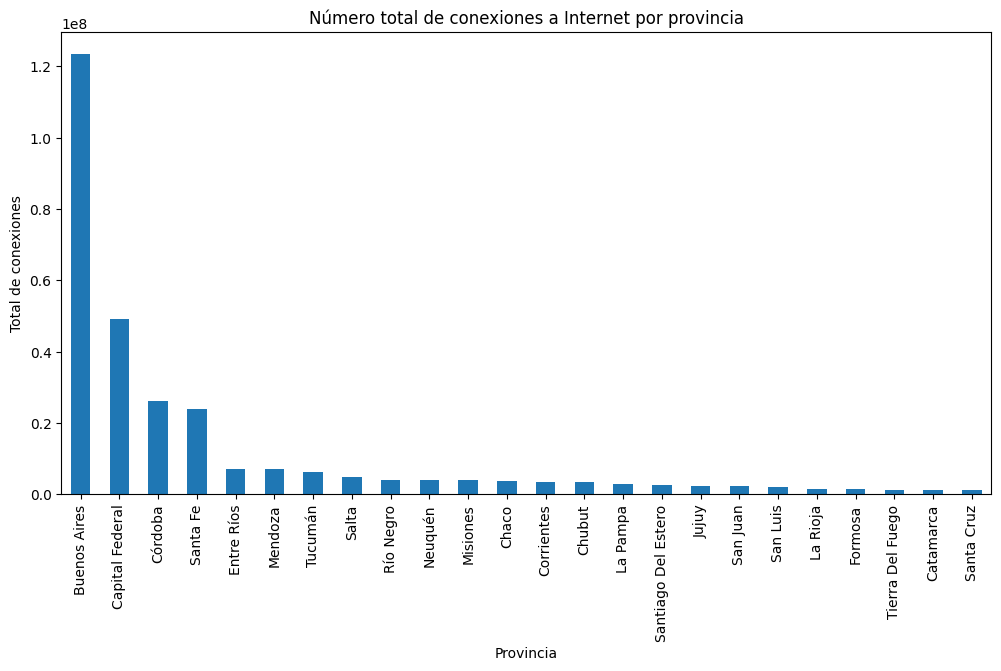

In [76]:
#provincia con mayor numero de conexiones a internet.
conexiones_por_provincia = datos_internet.groupby('Provincia')['Total_conexiones'].sum().sort_values(ascending=False)
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))
# Graficar las conexiones por provincia
conexiones_por_provincia.plot(kind='bar')
# Configurar los títulos y etiquetas de los ejes
plt.title('Número total de conexiones a Internet por provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de conexiones')
# Mostrar la gráfica
plt.show()


A continuación  podemos observar como el pasar de los años ha aumentado la conexiones totales a internet, la cual ha ido en ascenso, no obstante, en el año 2022 vemos una reducción significativa en dichas conexione, sin embargo, esto se debe a que los datos no están completos, ya que solo llegan hasta el tercer trimestre de dicho año. 

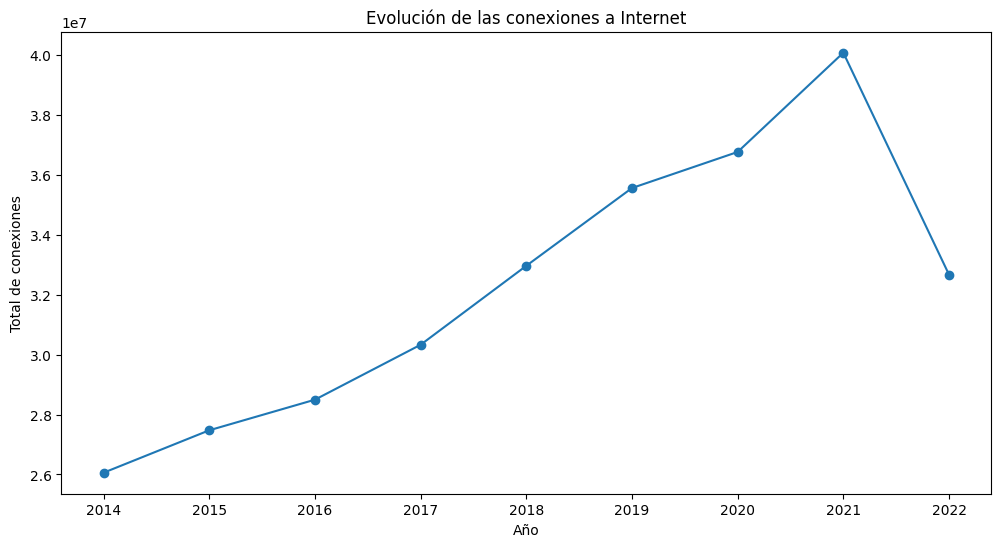

In [77]:
# Obtener la suma de conexiones por año
conexiones_por_año = datos_internet.groupby('Año')['Total_conexiones'].sum()

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
conexiones_por_año.plot(kind='line', marker='o')
plt.title('Evolución de las conexiones a Internet')
plt.xlabel('Año')
plt.ylabel('Total de conexiones')
plt.show()


A continuación, podemos ver un gráfico de línea que nos da un vistazo de cómo la tecnología de conexión a Internet ha avanzado a lo largo de los años. Observamos que la conexión por cable módem sigue siendo la más popular. De igual manera, la conexión ADSL ha disminuido, dando paso a tecnologías como la fibra óptica.

Debido a que hay datos muy minúsculos en comparación con las otras conexiones, se utiliza una función de logaritmos para hacer una aproximación de los datos y que estos sean tomados en cuenta por el gráfico.

<Figure size 1200x600 with 0 Axes>

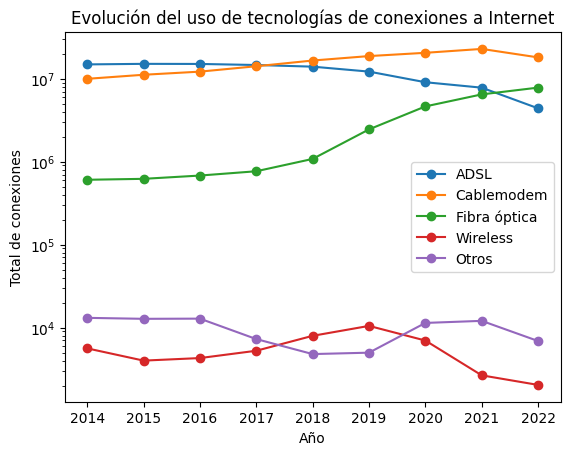

In [78]:
# Obtener la suma de conexiones por año
Tegnologia_conexiones = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
uso_tecno_año = datos_internet.groupby('Año')[Tegnologia_conexiones].sum()

# Configurar el gráfico de línea con escala logarítmica en el eje y
plt.figure(figsize=(12, 6))
uso_tecno_año.plot(kind='line', marker='o')
plt.title('Evolución del uso de tecnologías de conexiones a Internet')
plt.xlabel('Año')
plt.ylabel('Total de conexiones')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.show()


En el siguiente gráfico de línea, podemos ver la comparación entre los tipos de conexiones a Internet: Dial Up y banda ancha. La conexión banda ancha ha estado en ascenso desde 2014, a diferencia de la conectividad Dial Up.

La conexión Dial Up utiliza la infraestructura telefónica ya existente, similar a la tecnología ADSL. Según los datos registrados desde 2014, se puede observar una correlación directa entre el aumento de las conexiones banda ancha y la disminución de las conexiones que utilizan la infraestructura telefónica existente, como ADSL. Esto sugiere que las conexiones que tienen su propia infraestructura, como fibra óptica o conexión por cable módem, están ganando terreno sobre aquellas que dependen de la infraestructura telefónica.

<Figure size 1200x600 with 0 Axes>

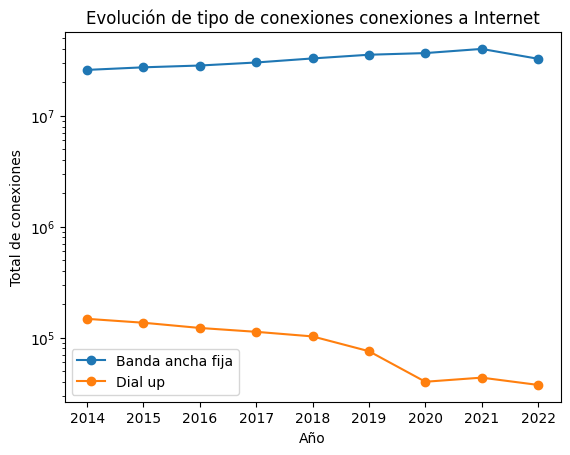

In [79]:
# Obtener la suma de tipo de conexiones por año
Tipo_conexiones = ['Banda ancha fija', 'Dial up']
Tipo_conexiones_año = datos_internet.groupby('Año')[Tipo_conexiones].sum()

# Configurar el gráfico de línea con escala logarítmica en el eje y
plt.figure(figsize=(12, 6))
Tipo_conexiones_año.plot(kind='line', marker='o')
plt.title('Evolución de tipo de conexiones conexiones a Internet')
plt.xlabel('Año')
plt.ylabel('Total de conexiones')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.show()

En este gráfico de pastel podemos observar que la tecnología más usada es cable módem con más del 50% del mercado ocupado

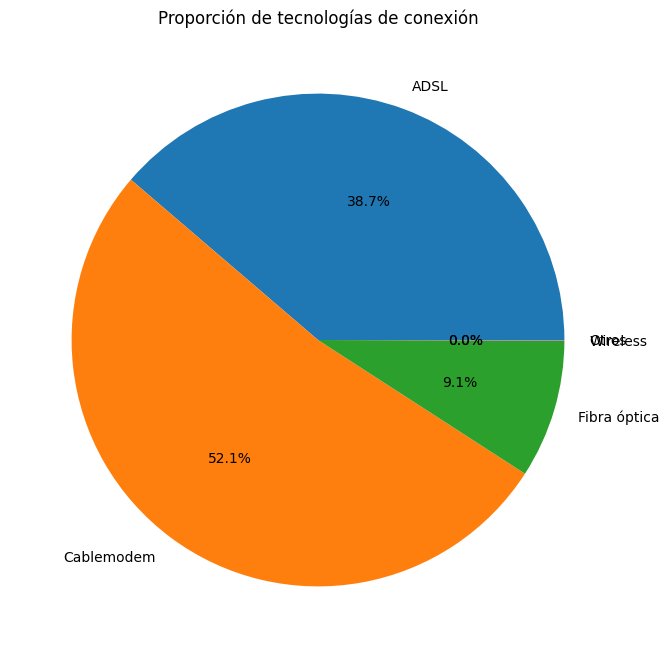

In [80]:
# Obtener la suma de conexiones por tecnología
conexiones_por_tecnologia = datos_internet[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
conexiones_por_tecnologia.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de tecnologías de conexión')
plt.ylabel('')
plt.show()


En el siguiente gráfico de barras podemos ver la distribución de la utilización de tecnologías de conexiones por cada una de las provincias

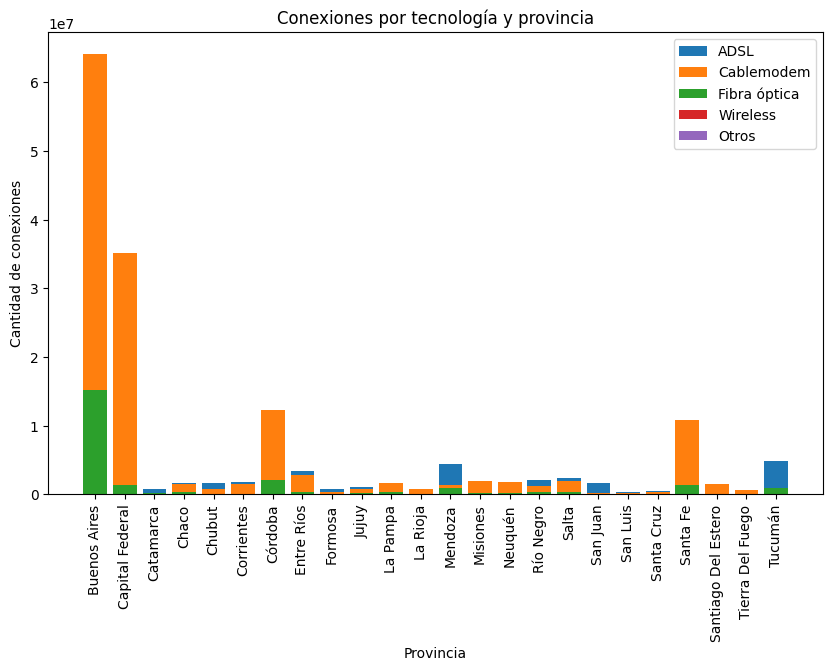

In [81]:
# Obtener los datos de conexiones por tecnología para cada provincia
conexiones_por_provincia_adsl = datos_internet.groupby('Provincia')['ADSL'].sum()
conexiones_por_provincia_cablemodem = datos_internet.groupby('Provincia')['Cablemodem'].sum()
conexiones_por_provincia_fibra = datos_internet.groupby('Provincia')['Fibra óptica'].sum()
conexiones_por_provincia_Wireless = datos_internet.groupby('Provincia')['Wireless'].sum()
conexiones_por_provincia_Otros = datos_internet.groupby('Provincia')['Otros'].sum()


# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(conexiones_por_provincia_adsl.index, conexiones_por_provincia_adsl, label='ADSL')
plt.bar(conexiones_por_provincia_cablemodem.index, conexiones_por_provincia_cablemodem, label='Cablemodem')
plt.bar(conexiones_por_provincia_fibra.index, conexiones_por_provincia_fibra, label='Fibra óptica')
plt.bar(conexiones_por_provincia_Wireless.index, conexiones_por_provincia_Wireless, label='Wireless')
plt.bar(conexiones_por_provincia_Otros.index, conexiones_por_provincia_Otros, label='Otros')


# Personalizar el gráfico
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.title('Conexiones por tecnología y provincia')
plt.legend()

# Ajustar la posición de las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


Este histograma nos demuestra que es más frecuente una conexión a internet con una velocidad de media baja que con una velocidad de media alta

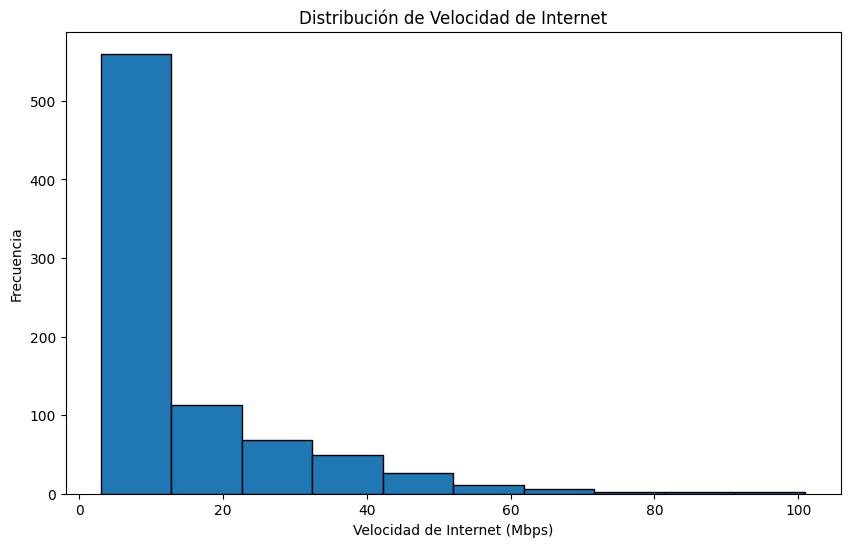

In [82]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma
plt.hist(datos_internet['Mbps (Media de bajada)'], bins=10, edgecolor='black')

# Configurar los títulos y etiquetas de los ejes
plt.title('Distribución de Velocidad de Internet')
plt.xlabel('Velocidad de Internet (Mbps)')
plt.ylabel('Frecuencia')

        # Mostrar la gráfica
plt.show()


Creamos una tabla pivote que nos ayude a tener una perspectiva de cómo ha aumentado la calidad de velocidad año tras año

In [83]:
pd.pivot_table(datos_internet, index= 'Año', values= 'Mbps (Media de bajada)', aggfunc='mean')

,Mbps (Media de bajada)
Año,
2014,3
2015,4
2016,5
2017,6
2018,10
2019,14
2020,22
2021,29
2022,37


A continuación, realizaremos dos gráficos: uno de barras y otro de líneas. El gráfico de barras representa la cantidad de suscripciones a TV por provincia, mientras que el gráfico de líneas muestra la cantidad de suscripciones adquiridas a lo largo de los años. En este último gráfico, es importante señalar que los datos para el año 2022 están incompletos, ya que solo llegan hasta el tercer trimestre. Sin embargo, se puede observar que estos datos son particularmente bajos en comparación con años anteriores.

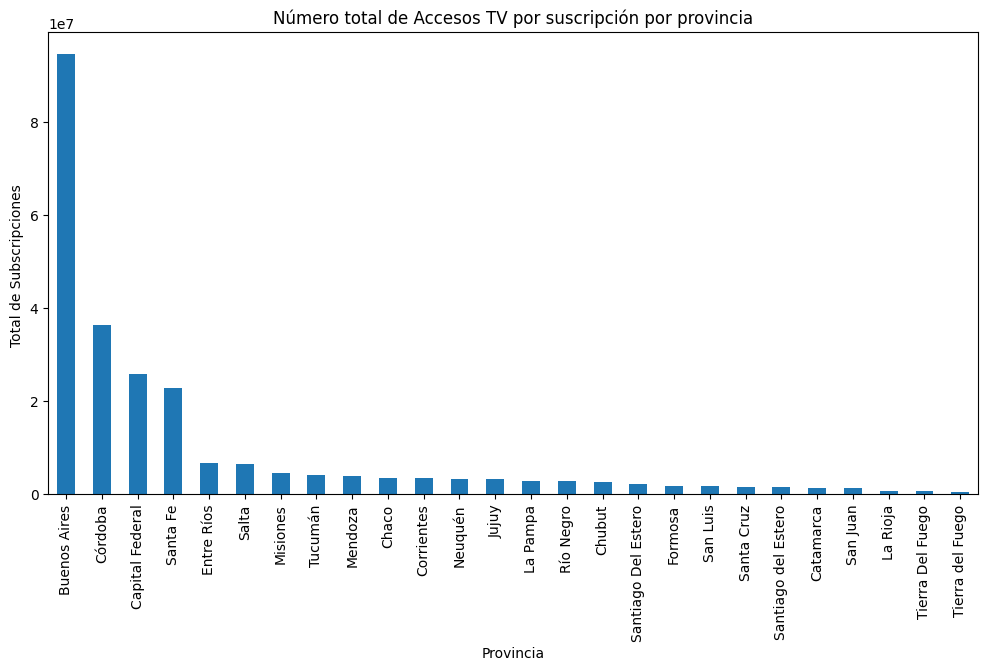

In [84]:
#provincia con mayor numero de suscripciónes a tv.
Subscripciones_por_provincia = television.groupby('Provincia')['Accesos TV por suscripción'].sum().sort_values(ascending=False)
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))
# Graficar las suscripciónes por provincia
Subscripciones_por_provincia.plot(kind='bar')
# Configurar los títulos y etiquetas de los ejes
plt.title('Número total de Accesos TV por suscripción por provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Subscripciones ')
# Mostrar la gráfica
plt.show()

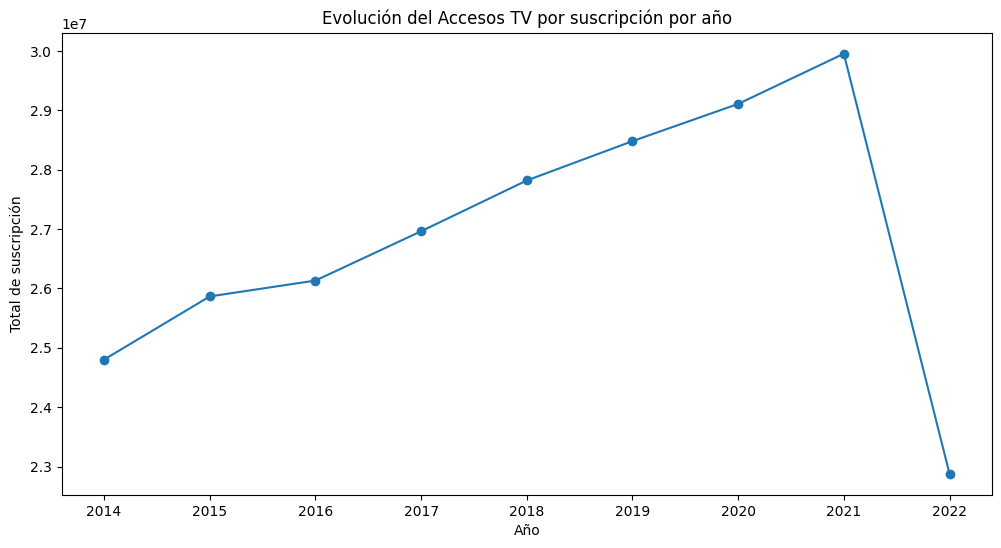

In [85]:
# Obtener la suma de suscripción por año
Subscripciones_por_año = television.groupby('Año')['Accesos TV por suscripción'].sum()

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
Subscripciones_por_año.plot(kind='line', marker='o')
plt.title('Evolución del Accesos TV por suscripción por año')
plt.xlabel('Año')
plt.ylabel('Total de suscripción')
plt.show()

A continuación, realizamos un gráfico de barras y un gráfico de líneas. En el gráfico de barras, se muestra la cantidad de correos o servicios postales utilizados por provincia. En el gráfico de líneas, se muestra la evolución de estos servicios postales a lo largo de los años. En este último gráfico, se observa que la utilización de los servicios postales ha disminuido a medida que pasan los años.






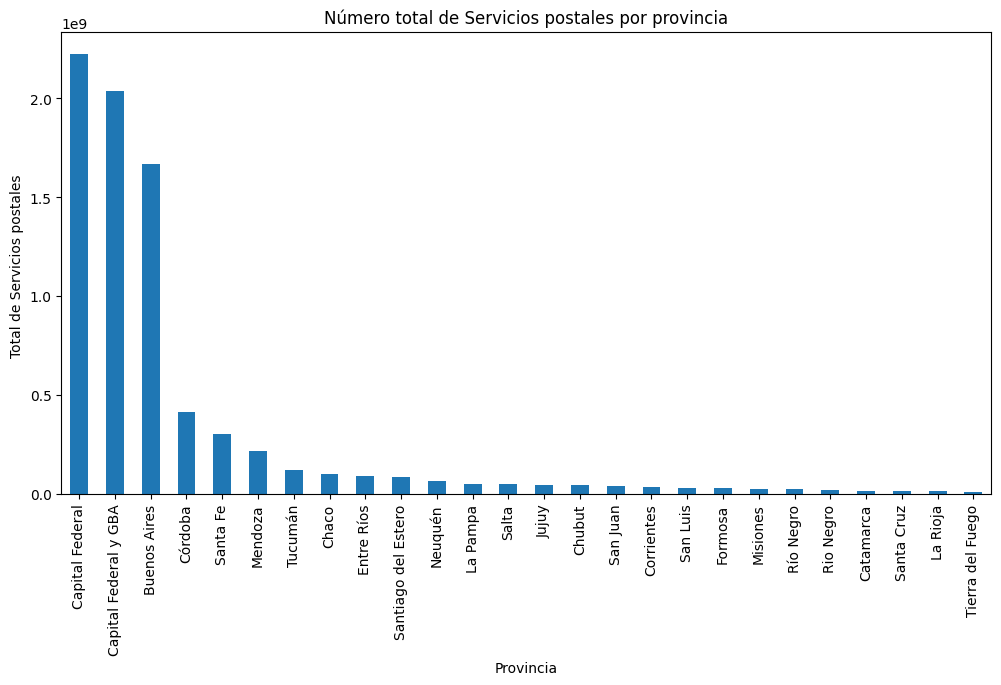

In [86]:
#provincia con mayor numero de Servicios postales.
Servicios_postales_provinica = postales.groupby('Provincia')['Correo oficial + Correos Privados (en Unidades)'].sum().sort_values(ascending=False)
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))
# Graficar las Servicios postales por provincia
Servicios_postales_provinica.plot(kind='bar')
# Configurar los títulos y etiquetas de los ejes
plt.title('Número total de Servicios postales por provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Servicios postales ')
# Mostrar la gráfica
plt.show()

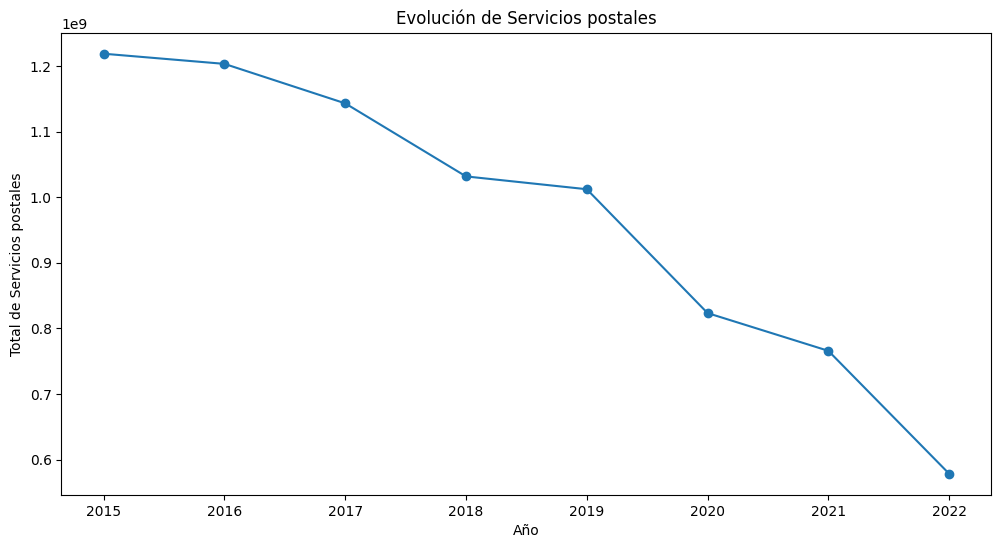

In [87]:
# Obtener la suma de Servicios postales por año
Servicios_postales_año= postales.groupby('Año')['Correo oficial + Correos Privados (en Unidades)'].sum()
# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
Servicios_postales_año.plot(kind='line', marker='o')
plt.title('Evolución de Servicios postales')
plt.xlabel('Año')
plt.ylabel('Total de Servicios postales')
plt.show()

El siguiente gráfico de barras múltiple pretende identificar si hay algún tipo de correlación entre las suscripciones a televisión, la adquisición de servicios postales y las conexiones a internet. Sin embargo, a pesar de que hay provincias en donde hay una menor cantidad de conexiones a internet y una mayor suscripción a TV y adquisición de servicios postales, no es una variable constante en las demás provincias. 


C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\3498234829.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\3498234829.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
C:\Users\makaw\AppData\Local\Temp\ipykernel_9252\3498234829.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


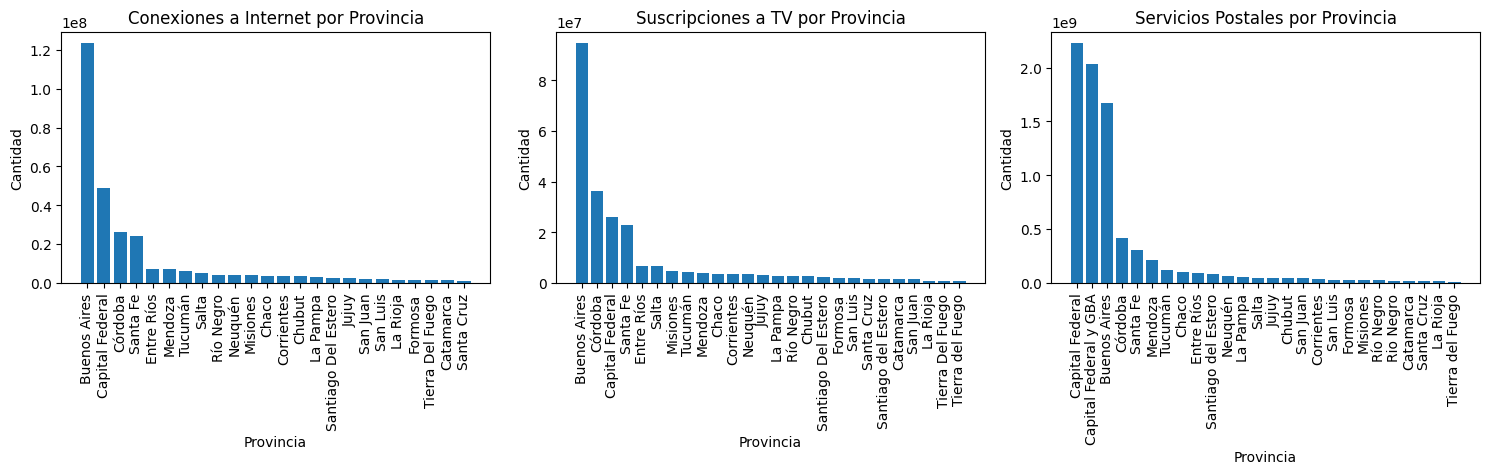

In [88]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de conexiones a internet por provincia
provincias_conexiones = datos_internet.groupby('Provincia')['Total_conexiones'].sum().sort_values(ascending=False)
axs[0].bar(provincias_conexiones.index, provincias_conexiones.values)
axs[0].set_xlabel('Provincia')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Conexiones a Internet por Provincia')

# Gráfico de suscripciones a televisión por provincia
provincias_tv = television.groupby('Provincia')['Accesos TV por suscripción'].sum().sort_values(ascending=False)
axs[1].bar(provincias_tv.index, provincias_tv.values)
axs[1].set_xlabel('Provincia')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Suscripciones a TV por Provincia')

# Gráfico de servicios postales utilizados por provincia
provincias_postales = postales.groupby('Provincia')['Correo oficial + Correos Privados (en Unidades)'].sum().sort_values(ascending=False)
axs[2].bar(provincias_postales.index, provincias_postales.values)
axs[2].set_xlabel('Provincia')
axs[2].set_ylabel('Cantidad')
axs[2].set_title('Servicios Postales por Provincia')

# Girar los títulos del eje X en 90 grados
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Al comparar el progreso a lo largo del tiempo de cada una de las variables que estamos midiendo (conexiones a internet, suscripciones a televisión y servicios postales utilizados), se puede observar que mientras las conexiones a internet y las suscripciones a TV no presentan diferencias significativas de un año a otro, los servicios postales muestran una clara tendencia a la baja a medida que transcurren los años.

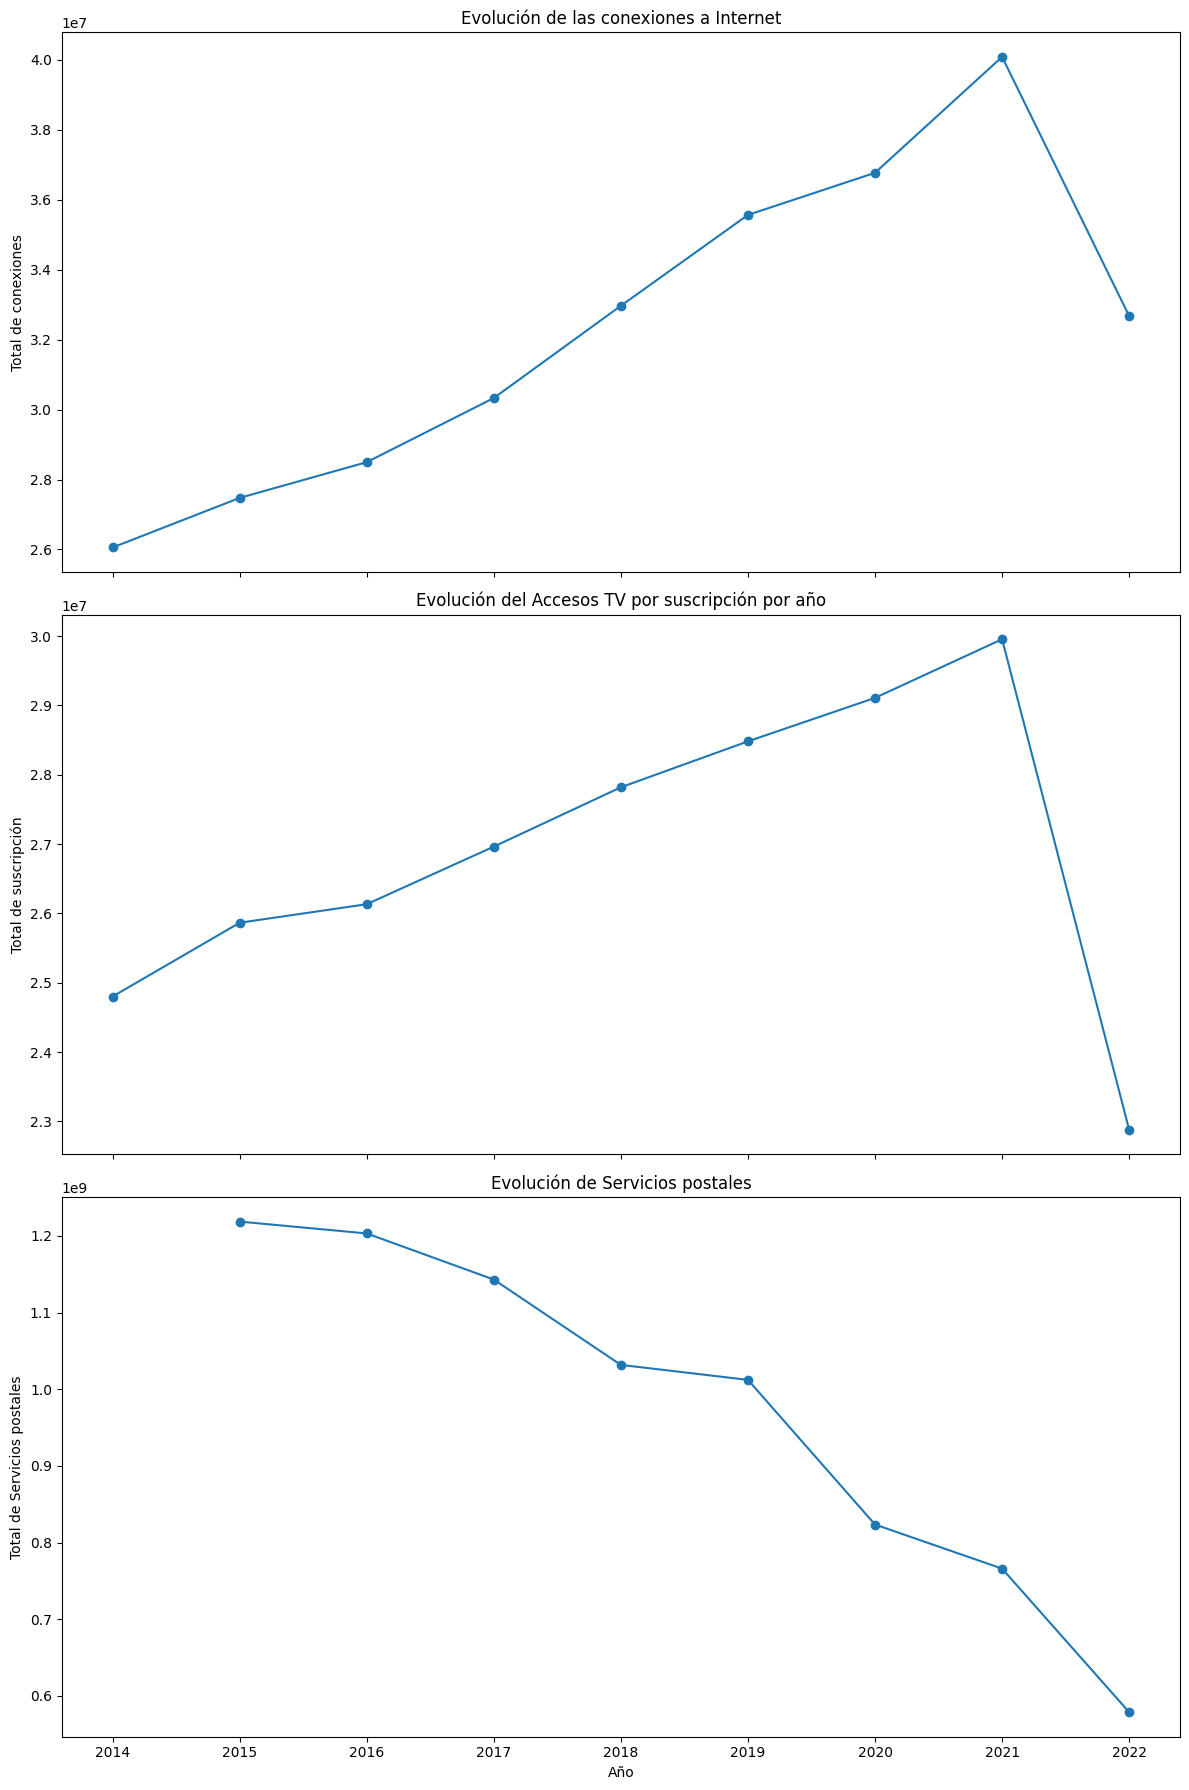

In [89]:
# Obtener la suma de conexiones por año
conexiones_por_año = datos_internet.groupby('Año')['Total_conexiones'].sum()

# Obtener la suma de suscripción por año
Subscripciones_por_año = television.groupby('Año')['Accesos TV por suscripción'].sum()

# Obtener la suma de Servicios postales por año
Servicios_postales_año = postales.groupby('Año')['Correo oficial + Correos Privados (en Unidades)'].sum()

# Crear la figura y los subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Graficar la evolución de las conexiones a Internet
conexiones_por_año.plot(kind='line', marker='o', ax=ax1)
ax1.set_title('Evolución de las conexiones a Internet')
ax1.set_ylabel('Total de conexiones')

# Graficar la evolución del Accesos TV por suscripción por año
Subscripciones_por_año.plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Evolución del Accesos TV por suscripción por año')
ax2.set_ylabel('Total de suscripción')

# Graficar la evolución de Servicios postales
Servicios_postales_año.plot(kind='line', marker='o', ax=ax3)
ax3.set_title('Evolución de Servicios postales')
ax3.set_xlabel('Año')
ax3.set_ylabel('Total de Servicios postales')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


identifiquemos si hay alguna correlacion en la conexiona internet y la disminucion de la utilizacion de los servicios postales

In [90]:
#dado que el dataset de postales no tiene las mismas provincias que el de datos_internet, se hará un filtro para solo tomar en cuenta las provincias en común 
provincias = datos_internet['Provincia'].unique()
postales_filtradas= postales[postales['Provincia'].isin(provincias)]

In [91]:
# Calcular la correlación entre los servicios postales y las conexiones a Internet
correlacion = datos_internet['Total_conexiones'].corr(postales_filtradas['Correo oficial + Correos Privados (en Unidades)'])

print("Correlación entre servicios postales y conexiones a Internet:", correlacion)


Correlación entre servicios postales y conexiones a Internet: 0.5869855628010935


La correlación entre los servicios postales y las conexiones a Internet es de aproximadamente 0.587. Esta correlación positiva sugiere que existe una relación moderada entre estas dos variables.

## 5. Concluciones EDA


1.	Conexiones a Internet: La provincia de Buenos Aires lidera en número de conexiones a Internet, seguida por otras provincias como Córdoba, Santa Fe y Mendoza. A lo largo de los años, se observa un incremento en el número total de conexiones, con una ligera disminución en el año 2022 debido a la falta de datos completos.

2.	Tecnologías de conexión: El cable módem es la tecnología más utilizada para acceder a Internet en la mayoría de las provincias, seguido de ADSL y fibra óptica. Otras tecnologías, como wireless u otras, tienen una presencia menor.

3.	Velocidad de Internet: Se encuentra una distribución más frecuente de velocidades de conexión a Internet de media baja en comparación con velocidades de media alta.

4.	Suscripciones de TV: No se observa una correlación clara entre las suscripciones de televisión por provincia y las conexiones a Internet. Las provincias muestran variabilidad en la cantidad de suscripciones, sin una tendencia clara.

5.	Servicios postales: A medida que pasan los años, se aprecia una disminución en la utilización de servicios postales en Argentina. Sin embargo, no se encuentra una correlación significativa entre los servicios postales y las conexiones a Internet.

6.  Existe una posible relación entre la infraestructura telefónica y la disminución en la utilización de las tecnologías de conexión Dial Up y DSL. A medida que avanza el tiempo, se observa una tendencia decreciente en la utilización de estas tecnologías más antiguas. Esto puede deberse a una mejora en la infraestructura de telecomunicaciones, como la expansión de redes de fibra óptica y el despliegue de tecnologías más modernas. La disponibilidad de conexiones de mayor velocidad, como el cable módem y la fibra óptica, puede haber llevado a una disminución en la demanda de tecnologías más lentas y menos eficientes como Dial Up y DSL.

En general, se puede concluir que existe una relación moderada entre las conexiones a Internet y los servicios postales en Argentina. Sin embargo, no se encontró una correlación clara entre las suscripciones de TV y las conexiones a Internet. Estas conclusiones brindan información importante sobre el panorama de las comunicaciones en Argentina y pueden ser útiles para la toma de decisiones en el sector de las telecomunicaciones.

## 6. KPIS

In [92]:
#dado que el dataset de postales y televison  no tiene las mismas provincias que el de datos_internet, se hará un filtro para solo tomar en cuenta las provincias en común 
provincias = datos_internet['Provincia'].unique()
postales_filtradas= postales[postales['Provincia'].isin(provincias)]
TV_filtradas= television[television['Provincia'].isin(provincias)]


KPI: Crecimiento porcentual de conexiones, servicios postales y suscripciones TV:  
En este KPI podremos notar como fue el crecimiento o decrecimiento en porcentaje, del acceso a subscripciones de tv, utilización de servicios postales y conexión a internet, por año.

aunque se usa el metodo pct_change() de pandas, la formula para este kpi es:

        -Cambio porcentual = (Valor actual - Valor anterior) / Valor anterior * 100



In [93]:
#agrupamos el total de conexiones por año
Conexiones_anual = datos_internet.groupby('Año')['Total_conexiones'].sum()

In [94]:
# Calcula la diferencia porcentual entre el valor actual y el anterior en la serie "Conexiones_anual",
# y almacena los resultados en la variable "porcentaje_conexiones".
# Los valores se multiplican por 100 para obtener el resultado en porcentaje.
# Luego, se aplica una función lambda para redondear los valores a dos decimales y convertirlos en cadenas de texto.
# Si el valor es nulo, se asigna None.
porcentaje_conexiones = ((Conexiones_anual.pct_change() * 100).apply(lambda x: "{:.2f}".format(x) if pd.notnull(x) else None))

aplicaremos el mismo codigo pero para los dataset de postales y televiosn


In [95]:
Servicios_postales_año = postales_filtradas.groupby('Año')['Correo oficial + Correos Privados (en Unidades)'].sum()
porcentaje_servicios = ((Servicios_postales_año.pct_change() * 100).apply(lambda x: "{:.2f}".format(x) if pd.notnull(x) else None) )

In [96]:
subscripciones_anual = TV_filtradas.groupby('Año')['Accesos TV por suscripción'].sum()
porcentaje_suscripciones = ((subscripciones_anual.pct_change() * 100).apply(lambda x: "{:.2f}".format(x) if pd.notnull(x) else None) )

In [97]:
# Convertir las series resultantes en DataFrames
df_servicios = porcentaje_servicios.reset_index().rename(columns={'index': 'Año'})
df_conexiones = porcentaje_conexiones.reset_index().rename(columns={'index': 'Año'})
df_suscripciones = porcentaje_suscripciones.reset_index().rename(columns={'index': 'Año'})
# Combinar los DataFrames utilizando pd.merge()
df_porcentajes = pd.merge(df_servicios, df_conexiones, on='Año').merge(df_suscripciones, on='Año')
# remplazamos los datos none con 0, ya que no hay datos previos para comparar
df_porcentajes = df_porcentajes.fillna('0')
#Renombramos las columnas para que tengan coherencia con los datos que albergan en ella 
df_porcentajes = df_porcentajes.rename(columns={'Correo oficial + Correos Privados (en Unidades)': 'porcentaje de crecimiento de servicios postales', 'Total_conexiones': 'porcentaje de crecimiento de conexiones', 'Accesos TV por suscripción': 'porcentaje de crecimiento suscripciones TV'})
#cambiamor el tipo de dato en as colunas indicadas, para pasarlo de objet a float
columnas= ['porcentaje de crecimiento de servicios postales', 'porcentaje de crecimiento de conexiones', 'porcentaje de crecimiento suscripciones TV']
df_porcentajes[columnas] = df_porcentajes[columnas].round(2).astype(float)

In [98]:
#Ajustamos la configuración de visualización de pandas para mostrar más decimales
pd.set_option('display.float_format', '{:.2f}'.format)


In [99]:
df_porcentajes

,Año,porcentaje de crecimiento de servicios postales,porcentaje de crecimiento de conexiones,porcentaje de crecimiento suscripciones TV
0,2015,0.00,5.44,4.29
1,2016,-1.40,3.72,1.03
2,2017,-4.87,6.44,3.26
3,2018,-46.32,8.70,5.31
4,2019,-26.60,7.88,2.38
5,2020,-13.00,3.39,2.20
6,2021,-3.39,9.02,2.91
7,2022,-24.47,-18.49,-23.62


In [100]:
# df_porcentajes.to_csv('kpi\Crecimiento porcentual.csv', index=False)

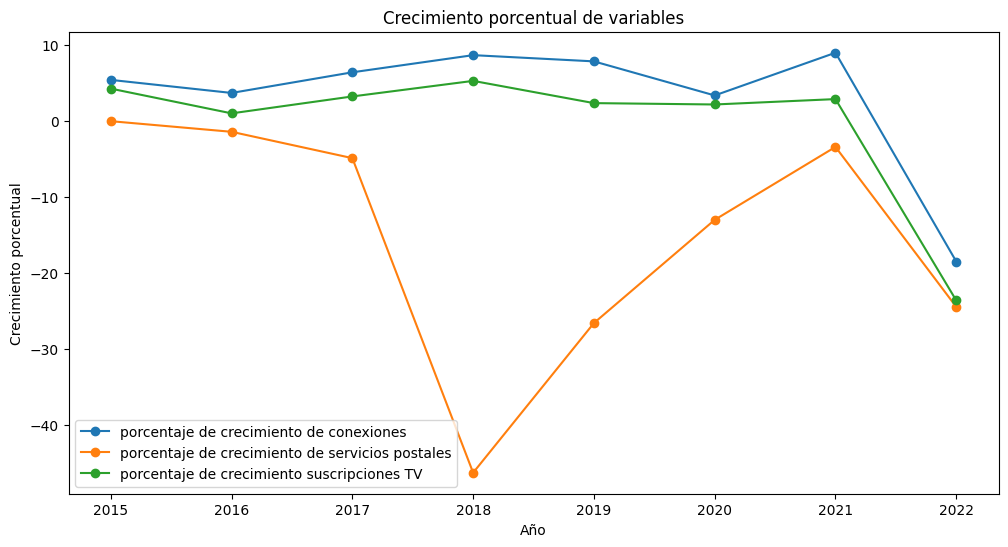

In [101]:
# Se definen las columnas de interés que representan el crecimiento porcentual de diferentes variables.
columnas = ['porcentaje de crecimiento de conexiones', 'porcentaje de crecimiento de servicios postales', 'porcentaje de crecimiento suscripciones TV']

# Se establece el tamaño de la figura del gráfico.
plt.figure(figsize=(12, 6))

# Se itera sobre cada columna y se grafican los puntos correspondientes al crecimiento porcentual en cada año.
for columna in df_porcentajes[columnas].columns:
    plt.plot(df_porcentajes['Año'], df_porcentajes[columna], marker='o', label=columna)

# Se establecen títulos y etiquetas de los ejes del gráfico.
plt.title('Crecimiento porcentual de variables')
plt.xlabel('Año')
plt.ylabel('Crecimiento porcentual')

# Se muestra una leyenda con las etiquetas de las columnas en la esquina inferior izquierda del gráfico.
plt.legend(loc='lower left')

# Se muestra el gráfico.
plt.show()


En cuanto a las conexiones de internet, podemos observar un patrón de crecimiento constante en los años anteriores. Los valores muestran un crecimiento positivo año tras año, lo cual indica un incremento de las conexiones a internet en comparación con el año anterior.

Recordemos que el año 2022 solo llega hasta el tercer trimestre, por lo que la falta de los datos del cuarto trimestre afecta el comportamiento de dicha variable.

Este caso no se repite con los otros datos referentes a televisión y servicios postales. En cuanto a la televisión, podemos observar que si bien tiene un crecimiento en números positivos, este es menor al de internet e incluso llega al punto en donde su crecimiento deja de ser mayor a los años anteriores. Se mantiene en parámetros similares, observando estabilidad.

Por otra parte, los servicios postales muestran constantemente una disminución e incluso sus porcentajes se evidencian en números negativos, lo que quiere decir que los servicios postales utilizados año tras año son menores que en el año anterior.

KPI: Distribución de tipos de conexión:

En este kpi podremos medir el porcentaje de conexiones de un tipo específico en relación con el total de conexiones anuales. 

La fórmula para calcular este KPI es la siguiente:

    -Fórmula: (Número de conexiones de un tipo específico / Total de conexiones anual) * 100.

In [102]:
#Determinamos las columnas objetivo
columnas=['Banda ancha fija', 'Dial up', 'Total_conexiones']
#Agrupamos la suma total del contenido de dichas columnas por año 
Distribucion_conexion= datos_internet.groupby('Año')[columnas].sum().reset_index().rename(columns={'index': 'Año'})

In [103]:
#Verificamos el resultado 
Distribucion_conexion

,Año,Banda ancha fija,Dial up,Total_conexiones
0,2014,25908873,147760,26056633
1,2015,27337549,136270,27473819
2,2016,28373776,122282,28496058
3,2017,30217820,112863,30330683
4,2018,32865578,102609,32968187
5,2019,35490694,75487,35566181
6,2020,36731204,40039,36771243
7,2021,40042775,43616,40086391
8,2022,32636329,37492,32673821


In [104]:
#Aplicamos la formula de nuestro KPI a las columnas objetivo Y creemos nuevas columnas con el resultado
Distribucion_conexion['Porcentaje banda ancha']= (Distribucion_conexion['Banda ancha fija'] / Distribucion_conexion['Total_conexiones']) * 100
Distribucion_conexion['Porcentaje Dial up']= (Distribucion_conexion['Dial up'] / Distribucion_conexion['Total_conexiones']) * 100

In [105]:
#Verificamos el resultado 
Distribucion_conexion

,Año,Banda ancha fija,Dial up,Total_conexiones,Porcentaje banda ancha,Porcentaje Dial up
0,2014,25908873,147760,26056633,99.43,0.57
1,2015,27337549,136270,27473819,99.50,0.50
2,2016,28373776,122282,28496058,99.57,0.43
3,2017,30217820,112863,30330683,99.63,0.37
4,2018,32865578,102609,32968187,99.69,0.31
5,2019,35490694,75487,35566181,99.79,0.21
6,2020,36731204,40039,36771243,99.89,0.11
7,2021,40042775,43616,40086391,99.89,0.11
8,2022,32636329,37492,32673821,99.89,0.11


In [106]:
#df_porcentajes.to_csv('kpi\Distribucion de tipos de conexion.csv', index=False)

Al analizar el KPI de Distribución de tipos de conexión, se evidencia claramente que el tipo de conexión de banda ancha fija predomina frente al tipo de conexión dial-up. Además, se observa un crecimiento constante de la banda ancha fija en comparación con la conexión dial-up, lo que indica una clara preferencia por conexiones más rápidas y estables.

Esta conclusión es válida y respalda la idea de que la distribución de tipos de conexiones no es uniforme, ya que hay una clara diferencia en la utizacion de diferentes tecnologías de conexión. La creciente preferencia por la banda ancha fija y la disminución del uso de la conexión dial-up son tendencias que muestran una evolución hacia conexiones más eficientes y avanzadas.

KPI: Penetración de banda ancha fija.

En este KPI podremos observar como la conexión de banda ancha fija a penetrado con respecto a la población de cada provincia, tomando como consideración solo las conexiones creadas en el año 2022 hasta el trimestre 3.

La fórmula para calcular este KPI es la siguiente:

    -Fórmula: (Número de usuarios con banda ancha fija en una provincia / Total de abitantes en la provincia) * 100.


De la agina oficial de censos de argentina  (https://www.indec.gob.ar/) obtuvimos acceso a la página https://censo.gob.ar/index.php/datos_provisionales/, de donde descargamos un archivo exel con los datos poblacionales de cada provincia en 

In [132]:
#Cargamos el archivo para convertirlo en un DF
poblacion = pd.read_excel('kpi\Poblacion de provinicas.xlsx')

In [133]:
#Filtramos el archivo para que solo contenga las provincias que contiene el DF de datos de internet 
poblacion_filtradas= poblacion[poblacion['Jurisdicción'].isin(provincias)]

In [134]:
#verificamos el resultado
poblacion_filtradas

,Jurisdicción,Total de viviendas particulares,Total de viviendas colectivas,Total de población,Población en viviendas particulares,Población en viviendas colectivas (1),Población en situación de calle (vía pública)
2,Buenos Aires,6695273,6535,17569053,17450899,117193,961
5,Catamarca,158989,449,429556,427415,2139,2
6,Chaco,401658,443,1142963,1137027,5877,59
7,Chubut,236010,1123,603120,599568,3508,44
8,Córdoba,1630356,3548,3978984,3946235,32658,91
9,Corrientes,406480,555,1197553,1195538,1977,38
10,Entre Ríos,559398,1159,1426426,1416324,9963,139
11,Formosa,212941,232,606041,604278,1763,///
12,Jujuy,276222,326,797955,797009,864,82
13,La Pampa,163805,437,366022,364556,1462,4


In [135]:
#Eliminamos las columnas que no serán necesarias para la elaboración de este KPI
columnas = ['Total de viviendas particulares', 'Total de viviendas colectivas', 'Población en viviendas particulares', 'Población en viviendas colectivas (1)', 'Población en situación de calle (vía pública)']
poblacion_filtradas = poblacion_filtradas.drop(columns=columnas)

In [136]:
#verificamos el resultado
poblacion_filtradas

,Jurisdicción,Total de población
2,Buenos Aires,17569053
5,Catamarca,429556
6,Chaco,1142963
7,Chubut,603120
8,Córdoba,3978984
9,Corrientes,1197553
10,Entre Ríos,1426426
11,Formosa,606041
12,Jujuy,797955
13,La Pampa,366022


In [137]:
#Creamos un DF que agrupe el total de conexiones de banda ancha por provincia y por año
acceso_bandaancha = datos_internet.groupby(['Provincia', 'Año'])['Banda ancha fija'].sum()
df_acceso_bandaancha =acceso_bandaancha.reset_index()
# nos quedamos solo con los datos del año 2022
df_acceso_bandaancha_2022 = df_acceso_bandaancha.loc[df_acceso_bandaancha['Año'] == 2022]
df_acceso_bandaancha_2022

,Provincia,Año,Banda ancha fija
8,Buenos Aires,2022,13925584
17,Capital Federal,2022,4495538
26,Catamarca,2022,199676
35,Chaco,2022,431814
44,Chubut,2022,497476
53,Corrientes,2022,432409
62,Córdoba,2022,3068696
71,Entre Ríos,2022,806171
80,Formosa,2022,190966
89,Jujuy,2022,350646


In [138]:
#unimos los DF por su provincia 
df_acceso_bandaancha_2022  = pd.merge(df_acceso_bandaancha_2022, poblacion_filtradas, left_on='Provincia', right_on='Jurisdicción')
df_acceso_bandaancha_2022  = df_acceso_bandaancha_2022.drop(columns='Jurisdicción')

In [139]:
# aplicamos las formula del kp para obtener el porcentaje de penetración de banda ancha por provincia.
df_acceso_bandaancha_2022['Penetracion de banda ancha']= (df_acceso_bandaancha_2022['Banda ancha fija']/ df_acceso_bandaancha_2022['Total de población'])*100
df_acceso_bandaancha_2022

,Provincia,Año,Banda ancha fija,Total de población,Penetracion de banda ancha
0,Buenos Aires,2022,13925584,17569053,79.26
1,Catamarca,2022,199676,429556,46.48
2,Chaco,2022,431814,1142963,37.78
3,Chubut,2022,497476,603120,82.48
4,Corrientes,2022,432409,1197553,36.11
5,Córdoba,2022,3068696,3978984,77.12
6,Entre Ríos,2022,806171,1426426,56.52
7,Formosa,2022,190966,606041,31.51
8,Jujuy,2022,350646,797955,43.94
9,La Pampa,2022,336837,366022,92.03


In [142]:
#df_acceso_bandaancha_2022.to_csv(r'kpi\acceso banda ancha 2022.csv', index=False)


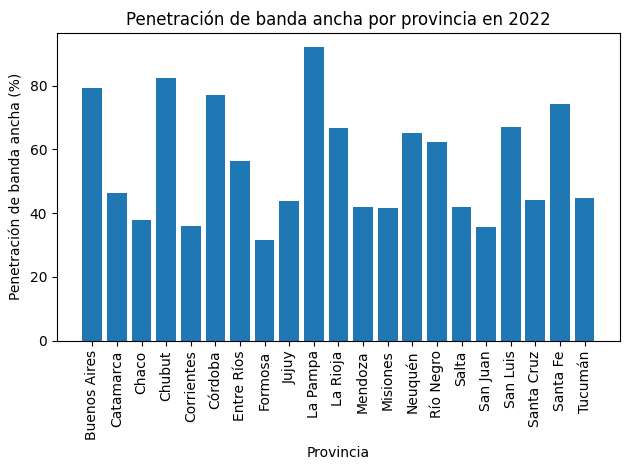

In [140]:
# Crear el gráfico de barras
plt.bar(df_acceso_bandaancha_2022['Provincia'], df_acceso_bandaancha_2022['Penetracion de banda ancha'])

# Agregar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Penetración de banda ancha (%)')
plt.title('Penetración de banda ancha por provincia en 2022')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este KPI, podemos observar cómo la penetración de la conexión banda ancha, por lo general, está por encima del 50% en cada una de las provincias. Considerando que no están los datos completos, puesto que falta los datos que corresponden al cuarto trimestre, nos da a inferir que el crecimiento de la utilización de dicha conexión va en aumento.
